## Pandas - introduction (Analyse des donnees du titanic)

#### ULR Dataset: https://www.kaggle.com/c/titanic/data

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [182]:
data_frame = pd.read_excel('titanic.xls')

type(data_frame) #pandas.core.frame.DataFrame
data_frame.shape #(1309, 14) Notice: pandas has been written based on numpy. That's why because we used attribute shape

data_frame.columns # ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',...]
data_frame.head() # to get preview

data_frame.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
                             axis=1,
                             inplace=True) # pour ne pas faire qlq kind: data = data.dropna(...)
data_frame.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [183]:
data_frame.describe() # to get some statitcs as: mean, std...

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [184]:
data_frame.age.count() #1046
data_frame.pclass.count() # 1309 ==> there is missing data in column pclass

# data_frame.fillna(data_frame['age'].mean()) #replace missing data by mean. But by the way we corrupt data so forget this methode

data_frame.dropna(axis=0, inplace=True) # Drop the rows where at least one element is missing
data_frame.pclass.count() #1046 insted 1309 !!!!!! en principe  i should have 1309 rows for all columns

1046

In [185]:
data_frame['pclass'].value_counts()
# 3    501 --> thant means: 501 passegngers in class 3 ...
# 1    284
# 2    261

3    501
1    284
2    261
Name: pclass, dtype: int64

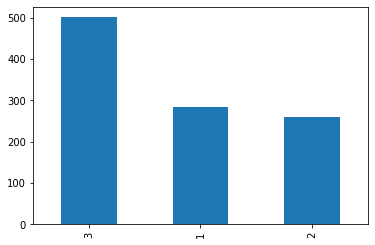

In [186]:
data_frame['pclass'].value_counts().plot.bar() # pandas fonctionne en collaboration avec matplotlib



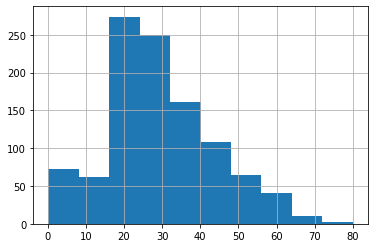

In [187]:
data_frame['age'].hist()

In [188]:
data_frame.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

<hr/>
<p style='font-weight:bold'> Panda has 2 kinds of data structures:</p>
<ul>
    <li><span style="text-decoration: underline";>Series</span> : Serie is just column. Serie = ndarray 1D + axe d'index</li>
        <ul>
            <li>Le tableau numpy.ndarray contient son propre index</li>
            <li>L'axe index est independant completement de numpy. On peut meme le modifier avec la methode: set_index() See example in cell below</li>
            <li>We can regroup series when that share same index.</li>
        </ul><br/>
    <li><span style="text-decoration: underline";>DataFrame</span>: So DataFram is just clustring of series</li>
        <ul>
            <li>DataFram = ~Dictionnaire de Series. df['columns'] = une serie (e.g: df['age'] = [10 ans, 39 ans, 50 ans. 95 ans, 6 ans ...])</li>
        </ul>
</ul>
<hr/>

In [189]:
temp_data = pd.read_excel('titanic.xls')
temp_data.set_index('name', inplace=True)
temp_data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [190]:
data_frame['age'][0:10] # je veux les dix premiers lignes de la serie age

data_frame['age'] < 18
data_frame[data_frame['age'] < 18] # I want only younger passangers 

data_frame[data_frame['age'] < 18].groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

### iloc and loc (index localisation)
</br> Reprend l'indexation de numpay


In [191]:
data_frame.iloc[0:3, 0:2] # je veux les 2 premires lignes + colonne 1 et 2

data_frame.loc[0:3, ['pclass', 'survived']] # je veux les 3 first lines des colonne 'pclass' & 'survived'

,pclass,survived
0,1,1
1,1,1
2,1,0
3,1,0


## Exercice

In [192]:
# Modify column 'age' in order to creat 4 categories:
# cat0: < 20 years old
# cat1: 20 - 30
# cat2: 30 - 40
# cat3: + 40

# avoid Simple method: data_frame.loc[data_frame['age'] < 20, 'age'] = 0

def category_age(age):
    if(age < 20):
        return 'cat0'
    if(age > 20) & (age == 30):
        return 'cat1'
    if(age > 30) & (age == 40):
        return 'cat2'
    else :
        return "cat3"
    
data_frame['age'].map(category_age)

0       cat3
1       cat0
2       cat0
3       cat1
4       cat3
        ... 
1301    cat3
1304    cat0
1306    cat3
1307    cat3
1308    cat3
Name: age, Length: 1046, dtype: object

## Convert data with map, replace, astype 

In [193]:

data_frame['sex'] # ...dtype: object 

data_frame['sex'].map({"male": 0, 'female':1})
data_frame['sex'].replace(["male", 'female'], [0,1])

data_frame['sex'].astype('category')# ...... dtype: category Categories (2, object): [female, male]

data_frame['sex'].astype('category').cat.codes # ..... dtype: int8



0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8